## Problem Statement

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

### Column information

ID -------------------------------------- Customer ID

Age ------------------------------------- Customer's age in completed years

Experience ------------------------------ #years of professional experience

Income ---------------------------------- Annual income of the customer ($000)

ZIPCode --------------------------------- Home Address ZIP code.

Family ---------------------------------- Family size of the customer

CCAvg ----------------------------------- Avg. spending on credit cards per month ($000)

Education ------------------------------- Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage -------------------------------- Value of house mortgage if any. ($000)

Personal Loan --------------------------- Did this customer accept the personal loan offered in the last campaign?

Securities Account ---------------------- Does the customer have a securities account with the bank?

CD Account ------------------------------ Does the customer have a certificate of deposit (CD) account with the bank?

Online ---------------------------------- Does the customer use internet banking facilities?

CreditCard ------------------------------ Does the customer use a credit card issued by UniversalBank?


In [308]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [309]:
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_data.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [310]:
print(bank_data.shape)
bank_data.describe()

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


From the above data we can conclude that there are a total of 5000 customers in the survey. Ans as we can see from the first line of the data description, we see that there are no 'null' or 'NANs' in the data presented to us. 

In [311]:
#to remove the whitespaces in the column names
bank_data.rename(columns=lambda x: x.strip(),inplace=True)

## Income

In [312]:
Q1_income = bank_data.loc[:,"Income"].quantile(0.25)
#print(Q1)
Q3_income = bank_data.loc[:,"Income"].quantile(0.75)
#print(Q3)
IQR_income = Q3_income - Q1_income
print("theoretical min:  " + str(Q1_income - 1.5*IQR_income))
print("theoretical max:  " + str(Q3_income + 1.5*IQR_income))
print("Max: "+str(max(bank_data.loc[:,"Income"])))

theoretical min:  -49.5
theoretical max:  186.5
Max: 224


In [313]:
bank_data[(bank_data["Income"]>(Q3_income + 1.5*IQR_income))].shape

for i in range(bank_data.shape[0]):
    if bank_data.iloc[i,3]>(Q3_income + 1.5*IQR_income):
        bank_data.iloc[i,3] = (Q3_income + 1.5*IQR_income)
        
bank_data[(bank_data["Income"]>(Q3_income + 1.5*IQR_income))].shape

(0, 14)

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


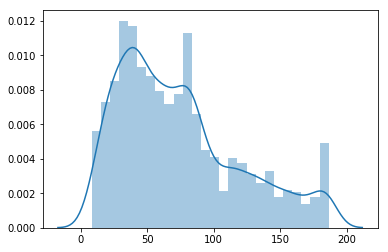

In [314]:
sns.distplot(np.array(bank_data.loc[:,"Income"]))

From the above data we can conclude that the Income column has some outliers. Max value is 224, where as the theoretical max is 186.5 and there are about 96 values that are greater. i.e, about 2% of the total data. 
### Hence, we can equate these values to the theoretical max and proceed with the calculations. 

## Mortgage

In [315]:
Q1_mortgage = bank_data.loc[:,"Mortgage"].quantile(0.25)
#print(Q1)
Q3_mortgage = bank_data.loc[:,"Mortgage"].quantile(0.75)
#print(Q3)
IQR_mortgage = Q3_mortgage - Q1_mortgage
print(Q1_mortgage - 1.5*IQR_mortgage)
print(Q3_mortgage + 1.5*IQR_mortgage)

-151.5
252.5


In [316]:
bank_data[(bank_data.loc[:,"Mortgage"]>(Q3_mortgage + 1.5*IQR_mortgage))].shape

(291, 14)

In [317]:
bank_data[(bank_data.loc[:,"Mortgage"]>0)].shape

(1538, 14)

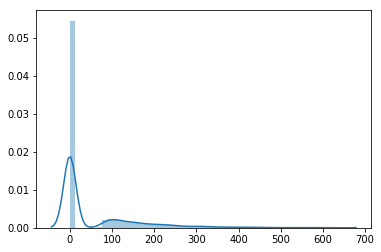

In [318]:
sns.distplot(np.array(bank_data.loc[:,"Mortgage"]))

## CCAvg

In [319]:
Q1_ccavg = bank_data.loc[:,"CCAvg"].quantile(0.25)
#print(Q1)
Q3_ccavg = bank_data.loc[:,"CCAvg"].quantile(0.75)
#print(Q3)
IQR_ccavg = Q3_ccavg - Q1_ccavg
print(Q1_ccavg - 1.5*IQR_ccavg)
print(Q3_ccavg + 1.5*IQR_ccavg)

-2.0
5.2


In [320]:
bank_data[(bank_data.loc[:,"CCAvg"]>(Q3_ccavg + 1.5*IQR_ccavg))].shape

(324, 14)

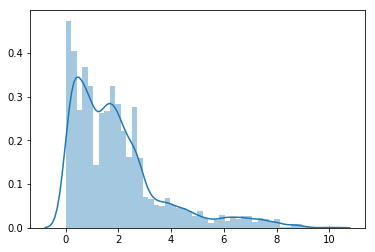

In [321]:
sns.distplot(np.array(bank_data.loc[:,"CCAvg"]))

## Age and Experience

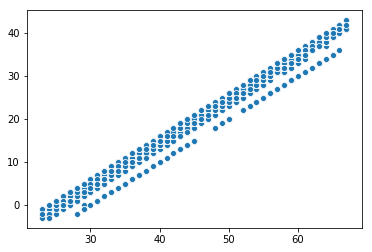

In [322]:
sns.scatterplot(np.array(bank_data["Age"]),np.array(bank_data["Experience"]))

## Age and Income

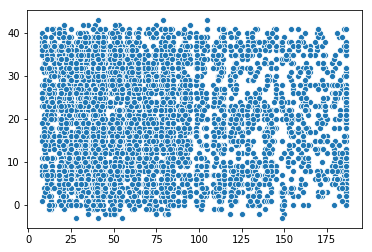

In [323]:
sns.scatterplot(np.array(bank_data["Income"]),np.array(bank_data["Experience"]))

## Income and CCAvg

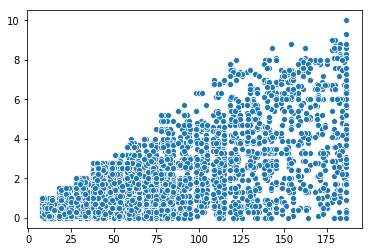

In [324]:
sns.scatterplot(np.array(bank_data["Income"]),np.array(bank_data["CCAvg"]))

## Income and Mortgage

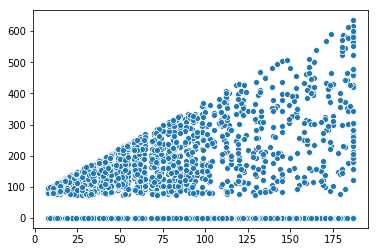

In [325]:
sns.scatterplot(np.array(bank_data["Income"]),np.array(bank_data["Mortgage"]))

## Scaling Income and Mortgage columns

In [327]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bank_data['Mortgage_scaled'] = scaler.fit_transform(bank_data['Mortgage'].values.reshape(-1,1))

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [328]:
bank_data['Income_scaled'] = scaler.fit_transform(bank_data['Income'].values.reshape(-1,1))

## Correlation matrix

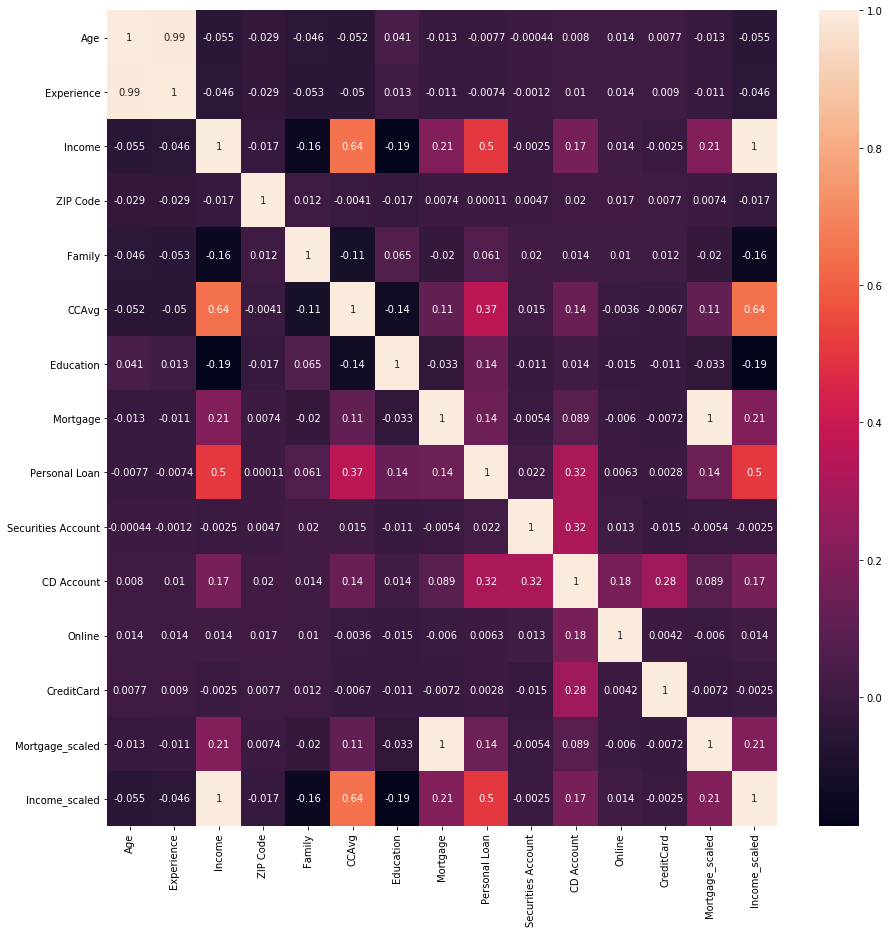

In [329]:
corr = bank_data.drop(columns = "ID").corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot = True, ax =ax)
plt.show()

In [330]:
bank_data.drop(columns = {"ID","Age","Online","CreditCard","ZIP Code","Experience","Income","Mortgage"}, inplace=True)
#Data for Naive Bayes
bank_data1 = bank_data.copy()
#Data for logistic regression
bank_data2 = bank_data.copy()

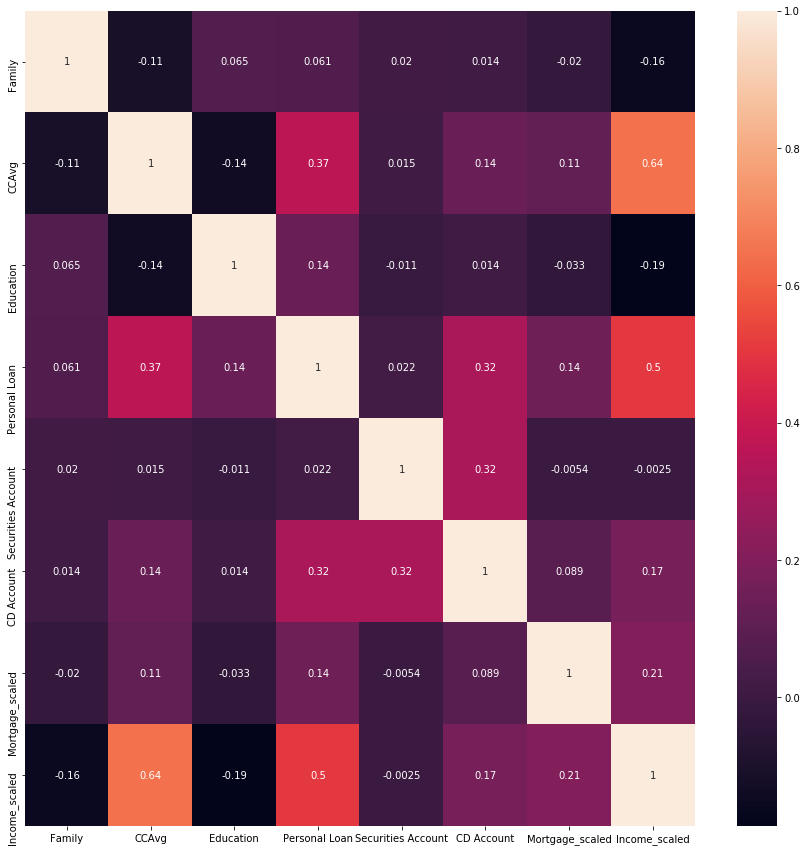

In [331]:
correlation = bank_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation,annot = True, ax =ax)
plt.show()
#bank_data_z = bank_data.apply(zscore)

## Test Train split

In [332]:
X = bank_data.drop(columns="Personal Loan")
y = bank_data['Personal Loan']

print(X.shape)

X_norm = preprocessing.normalize(X) 
print(X_norm.size)

(5000, 7)
35000


In [333]:
X_train,X_test,y_train,y_test = train_test_split(X_norm, y, train_size=0.7, test_size=0.3, random_state=25)

In [334]:
print(bank_data.shape)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5000, 8)
(3500, 7) (3500,)
(1500, 7) (1500,)


## KNN

### Finding out the best Parameters for KNN

In [335]:
from sklearn.model_selection import GridSearchCV

k = np.arange(10,30,2)
knn = KNeighborsClassifier(algorithm = 'kd_tree')
parameters = {'n_neighbors' : k}
##GS = GridSearchCV(knn, parameters, scoring = my_auc, cv=10)
GS = GridSearchCV(knn, parameters, scoring = 'roc_auc', cv=10)

In [336]:
GS.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [337]:
GS.best_params_

{'n_neighbors': 26}

In [338]:
GS.best_score_

0.9292810635931655

### Implementing KNN by using the k value from above 

In [339]:
NNH = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=26, p=2,
           weights='uniform')

In [340]:
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=26, p=2,
           weights='uniform')

In [341]:
bank_data['Prob']=pd.DataFrame(NNH.predict_proba(X_train))[1]
bank_data.head(10)

,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Mortgage_scaled,Income_scaled,Prob
0,4,1.6,1,0,1,0,0.000000,0.229692,0.000000
1,3,1.5,1,0,1,0,0.000000,0.145658,0.038462
2,1,1.0,1,0,0,0,0.000000,0.016807,0.000000
3,1,2.7,2,0,0,0,0.000000,0.515406,0.000000
4,4,1.0,2,0,0,0,0.000000,0.207283,0.000000
5,4,0.4,2,0,0,0,0.244094,0.117647,0.000000
6,2,1.5,2,0,0,0,0.000000,0.358543,0.115385
7,1,0.3,3,0,0,0,0.000000,0.078431,0.115385
8,3,0.6,2,0,0,0,0.163780,0.408964,0.153846
9,1,8.9,3,1,0,0,0.000000,0.963585,0.692308


In [ ]:
#bank_data.head(10)

In [342]:
## Model Performance Measure
## Deciling
bank_data['decile']=pd.qcut(bank_data.Prob.rank(method='first'), 10, labels=False)

## Rank Order Table and KS Statistics
def Response_Rate(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)


RRate = Response_Rate(bank_data.iloc[0:3500,:],"Prob","Personal Loan")
RRate

,decile,min_prob,max_prob,avg_prob,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,9.0,0.269231,1.000000,0.454945,350.0,41.0,309.0,11.71,41.0,309.0,11.58,9.82,1.76
8,8.0,0.115385,0.269231,0.181209,350.0,37.0,313.0,10.57,78.0,622.0,22.03,19.77,2.26
7,7.0,0.038462,0.115385,0.092637,350.0,34.0,316.0,9.71,112.0,938.0,31.64,29.82,1.82
6,6.0,0.038462,0.038462,0.038462,350.0,32.0,318.0,9.14,144.0,1256.0,40.68,39.92,0.76
5,5.0,0.000000,0.038462,0.001429,350.0,31.0,319.0,8.86,175.0,1575.0,49.44,50.06,-0.62
4,4.0,0.000000,0.000000,0.000000,350.0,34.0,316.0,9.71,209.0,1891.0,59.04,60.11,-1.07
3,3.0,0.000000,0.000000,0.000000,350.0,37.0,313.0,10.57,246.0,2204.0,69.49,70.06,-0.57
2,2.0,0.000000,0.000000,0.000000,350.0,31.0,319.0,8.86,277.0,2523.0,78.25,80.20,-1.95
1,1.0,0.000000,0.000000,0.000000,350.0,43.0,307.0,12.29,320.0,2830.0,90.40,89.96,0.44
0,0.0,0.000000,0.000000,0.000000,350.0,34.0,316.0,9.71,354.0,3146.0,100.00,100.00,0.00


In [343]:
# Compute and print AUC score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(bank_data.iloc[0:3500,5],bank_data.iloc[0:3500,-1])
auc

0.4907517307475316

## Naive Bayes 

In [344]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [345]:
X1 = bank_data1.drop(columns="Personal Loan")
y1 = bank_data1['Personal Loan']

print(X.shape)

X1_norm = preprocessing.normalize(X) 
print(X1_norm.size)

(5000, 7)
35000


In [346]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1_norm, y1, train_size=0.7, test_size=0.3, random_state=25)

In [347]:
GNB = clf.fit(X1_train, y1_train)

In [348]:
bank_data1['Prob'] = pd.DataFrame(GNB.predict_proba(X1_train))[1]
bank_data1.head(10)

,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Mortgage_scaled,Income_scaled,Prob
0,4,1.6,1,0,1,0,0.000000,0.229692,0.403731
1,3,1.5,1,0,1,0,0.000000,0.145658,0.033189
2,1,1.0,1,0,0,0,0.000000,0.016807,0.052424
3,1,2.7,2,0,0,0,0.000000,0.515406,0.016614
4,4,1.0,2,0,0,0,0.000000,0.207283,0.005615
5,4,0.4,2,0,0,0,0.244094,0.117647,0.542694
6,2,1.5,2,0,0,0,0.000000,0.358543,0.021687
7,1,0.3,3,0,0,0,0.000000,0.078431,0.045390
8,3,0.6,2,0,0,0,0.163780,0.408964,0.068499
9,1,8.9,3,1,0,0,0.000000,0.963585,0.264458


In [349]:
## Model Performance Measure
## Deciling
bank_data1['decile']=pd.qcut(bank_data1.Prob.rank(method='first'), 10, labels=False)

## Rank Order Table and KS Statistics
def Response_Rate(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)


RRate = Response_Rate(bank_data1.iloc[0:3500,:],"Prob","Personal Loan")
RRate

,decile,min_prob,max_prob,avg_prob,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,9.0,5.049454e-01,1.000000,0.758724,350.0,35.0,315.0,10.00,35.0,315.0,9.89,10.01,-0.12
8,8.0,2.628807e-01,0.503960,0.383408,350.0,41.0,309.0,11.71,76.0,624.0,21.47,19.83,1.64
7,7.0,1.093744e-01,0.262088,0.181604,350.0,42.0,308.0,12.00,118.0,932.0,33.33,29.62,3.71
6,6.0,3.775709e-02,0.109182,0.062186,350.0,38.0,312.0,10.86,156.0,1244.0,44.07,39.54,4.53
5,5.0,1.806568e-02,0.037717,0.026174,350.0,30.0,320.0,8.57,186.0,1564.0,52.54,49.71,2.83
4,4.0,8.757265e-03,0.018013,0.012808,350.0,38.0,312.0,10.86,224.0,1876.0,63.28,59.63,3.65
3,3.0,3.618125e-03,0.008741,0.005871,350.0,33.0,317.0,9.43,257.0,2193.0,72.60,69.71,2.89
2,2.0,1.560262e-03,0.003616,0.002436,350.0,26.0,324.0,7.43,283.0,2517.0,79.94,80.01,-0.07
1,1.0,5.752480e-04,0.001557,0.000988,350.0,37.0,313.0,10.57,320.0,2830.0,90.40,89.96,0.44
0,0.0,7.585202e-11,0.000575,0.000290,350.0,34.0,316.0,9.71,354.0,3146.0,100.00,100.00,0.00


In [350]:
# Compute and print AUC score
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(bank_data1.iloc[0:3500,5],bank_data1.iloc[0:3500,-1])
auc1

0.5082484563603097

## Logistic Regression

In [353]:
bank_data2.describe()

,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Mortgage_scaled,Income_scaled
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2.396400,1.937938,1.881000,0.096000,0.104400,0.06040,0.088974,0.367604
std,1.147663,1.747659,0.839869,0.294621,0.305809,0.23825,0.160179,0.255609
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.173669
50%,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,0.000000,0.313725
75%,3.000000,2.500000,3.000000,0.000000,0.000000,0.00000,0.159055,0.504202
max,4.000000,10.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [354]:
## Information Value
exec(open("iv_function.py").read())
iv = information_value(df = bank_data2.iloc[:,1:],target = bank_data2['Personal Loan'])
iv

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in log
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in log
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log


,VAR_NAME,IV,BINS
0,Income_scaled,2.604722,4
1,CCAvg,1.172301,3
2,CD Account,0.615228,2
3,Mortgage_scaled,0.199699,3
4,Education,0.086682,2
5,Securities Account,0.005172,2
6,Personal Loan,0.000000,2


In [357]:
## Visualization Code
#ai = bank_data2.drop('Personal Loan',axis=1).select_dtypes([np.number]).columns
#for i in ai:
#    print(i)
#    fn_biz_viz(bank_data2,i,"Personal Loan", 
#               r"C:/JN/Residency 3/Project 2/Visualiszation")

Family
CCAvg
Education
Securities Account
CD Account
Mortgage_scaled
Income_scaled
decile


In [371]:
#Model development
#spliting into development, validation and hold-out sample
mydata = bank_data2.copy()
mydata_dev, mydata_val, mydata_holdout = np.split(
        mydata.sample(frac=1, random_state=121), 
        [int(.5*len(mydata)), 
         int(.8*len(mydata))]
        )

(len(mydata_dev), len(mydata_val), len(mydata_holdout))

(2500, 1500, 1000)

In [373]:
print(round(sum(mydata_dev['Personal Loan'])*100/len(mydata_dev),1),
    round(sum(mydata_val['Personal Loan'])*100/len(mydata_val),1),
    round(sum(mydata_holdout['Personal Loan'])*100/len(mydata_holdout),1))
mydata_dev.columns

9.5 9.8 9.6


Index(['Family', 'CCAvg', 'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Mortgage_scaled', 'Income_scaled', 'decile'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as sm
import statsmodels.api

## Running regression with all the variables
#mylogit = sm.glm(formula = """Personal Loan ~ Family + Education + Securities Accout 
#        + CD Account + Mortgage_scaled + Income_scaled + CCAvg""" , 
#        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()

mylogit = sm.glm(formula = "Personal Loan ~ Education" , data = mydata_dev,
                    family=statsmodels.api.families.Binomial()).fit()

mylogit.summary()

## Conclusion

KNN is more advantageous in this case because as we saw in the scater plot of the data, the distribution is not linear, it cannot be epresented by one single line. KNN is a non-parametric model and hence, it will be the most advantageous in predecting the output. Also, it is simple and easy algorithm. Also, Naive bayes works well with small datasets, here the dataset is not a small dataset(comparitively).